# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import plotly.express as px
import seaborn as sns
import PyPDF2
from collections import Counter
%matplotlib inline
%matplotlib notebook

In [86]:
sinasc = pd.read_csv('SINASC_RO_2019.csv')
sinasc.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [87]:
estrutura_sinasc = open('/Users/feldb/OneDrive/Documentos/Ebac/Tarefas/Modulo 06/Estrutura_SINASC_para_CD.pdf', 'rb')
read_pdf = PyPDF2.PdfFileReader(estrutura_sinasc)
page = read_pdf.getPage(0)
page_content = page.extractText()
pdf = page_content.encode('utf-8')
pdf

b'Estrutura de Dados SINASC \n \n \nSecretaria de Vigil\xc3\xa2ncia em Sa\xc3\xbade / MS    1 \n Estrutura do SINASC para o CD-ROM \n \nOs arquivos s\xc3\xa3o DBF e est\xc3\xa3o compactados na forma de  DBC. Para descompact\xc3\xa1-los, ou expandi-los \nutilize o TABWIN, op\xc3\xa7\xc3\xa3o Arquivos Comprime/Expande a rquivos DBF  \n \nOs campos dos arquivos s\xc3\xa3o os seguintes: \n \nCAMPO \nFORMUL\xc3\x81RIO SEQ  NOME  TIPO/TAM  DESCRI\xc3\x87\xc3\x83O  \nDeclara\xc3\xa7\xc3\xa3o 01 NUMERODN C(08) N\xc3\xbamero da DN,  seq\xc3\xbcenc ial por UF informante e por ano. \n6 02 LOCNASC C(01) Local de ocorr\xc3\xaancia do nascimento, conforme a tabel a: \n9:   Ignorado \n1:   Hospital \n2:   Outro Estab Sa\xc3\xbade \n3:   Domic\xc3\xadlio \n4:   Outros \n7 03 CODESTAB C(07) C\xc3\xb3digo de estabelecimento de sa \xc3\xbade. \n10 04 CODBAINASC C(08) C\xc3\xb3digo Bairro nascimento. \n11 05 CODMUNNASC  C(07) C\xc3\xb3digo do munic\xc3\xadpio de ocorr\xc3\xaancia. \n15 06 IDADEMAE C(02) I

#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [88]:
sinasc.loc[(sinasc['APGAR5']>= 0) & (sinasc['APGAR5']<= 3), 'APGAR5_CAT'] = 'asfixia grave'
sinasc.loc[(sinasc['APGAR5']>= 4) & (sinasc['APGAR5']<= 5), 'APGAR5_CAT'] = 'asfixia moderada'
sinasc.loc[(sinasc['APGAR5']>= 6) & (sinasc['APGAR5']<= 7), 'APGAR5_CAT'] = 'asfixia leve'
sinasc.loc[(sinasc['APGAR5']>= 8) & (sinasc['APGAR5']<= 10), 'APGAR5_CAT'] = 'normal'
sinasc[['APGAR5', 'APGAR5_CAT']]

,APGAR5,APGAR5_CAT
0,10.0,normal
1,9.0,normal
2,10.0,normal
3,10.0,normal
4,10.0,normal
...,...,...
27023,9.0,normal
27024,9.0,normal
27025,10.0,normal
27026,9.0,normal


#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

In [89]:
sinasc[['APGAR5', 'SEXO', 'GESTACAO']]

,APGAR5,SEXO,GESTACAO
0,10.0,Masculino,37 a 41 semanas
1,9.0,Feminino,37 a 41 semanas
2,10.0,Feminino,37 a 41 semanas
3,10.0,Feminino,37 a 41 semanas
4,10.0,Feminino,37 a 41 semanas
...,...,...,...
27023,9.0,Masculino,32 a 36 semanas
27024,9.0,Masculino,37 a 41 semanas
27025,10.0,Masculino,37 a 41 semanas
27026,9.0,Masculino,32 a 36 semanas


In [90]:
# Corrigindo os valores da coluna 'SEXO' conforme 'Estrutura_SINASC_para_CD.pdf':

#0: Ignorado
#1: Masculino
#2: Feminino

sinasc['SEXO']= sinasc['SEXO'].replace('Ignorado', 1)
sinasc['SEXO']= sinasc['SEXO'].replace('Feminino', 1)
sinasc['SEXO']= sinasc['SEXO'].replace('Masculino', 2)
sinasc[['APGAR5', 'SEXO', 'GESTACAO']]

,APGAR5,SEXO,GESTACAO
0,10.0,2.0,37 a 41 semanas
1,9.0,1.0,37 a 41 semanas
2,10.0,1.0,37 a 41 semanas
3,10.0,1.0,37 a 41 semanas
4,10.0,1.0,37 a 41 semanas
...,...,...,...
27023,9.0,2.0,32 a 36 semanas
27024,9.0,2.0,37 a 41 semanas
27025,10.0,2.0,37 a 41 semanas
27026,9.0,2.0,32 a 36 semanas


In [91]:
# Corrigindo os valores da coluna 'GESTACAO' conforme 'Estrutura_SINASC_para_CD.pdf':

#Semanas de gestação, conforme a tabela:
#9: Ignorado
#1: Menos de 22 semanas
#2: 22 a 27 semanas
#3: 28 a 31 semanas
#4: 32 a 36 semanas
#5: 37 a 41 semanas
#6: 42 semanas e mais

sinasc['GESTACAO'] = sinasc['GESTACAO'].replace(['Ignorado'], 0)
sinasc['GESTACAO'] = sinasc['GESTACAO'].replace(['Menos de 22 semanas'], 1)
sinasc['GESTACAO'] = sinasc['GESTACAO'].replace(['22 a 27 semanas'], 2)
sinasc['GESTACAO'] = sinasc['GESTACAO'].replace(['28 a 31 semanas'], 3)
sinasc['GESTACAO'] = sinasc['GESTACAO'].replace(['32 a 36 semanas'], 4)
sinasc['GESTACAO'] = sinasc['GESTACAO'].replace(['37 a 41 semanas'], 5)
sinasc['GESTACAO'] = sinasc['GESTACAO'].replace(['42 semanas e mais'], 6)
sinasc[['APGAR5', 'SEXO', 'GESTACAO']]

,APGAR5,SEXO,GESTACAO
0,10.0,2.0,5.0
1,9.0,1.0,5.0
2,10.0,1.0,5.0
3,10.0,1.0,5.0
4,10.0,1.0,5.0
...,...,...,...
27023,9.0,2.0,4.0
27024,9.0,2.0,5.0
27025,10.0,2.0,5.0
27026,9.0,2.0,4.0


In [92]:
#Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

In [93]:
data = sinasc.groupby(['APGAR5', 'GESTACAO']).agg({'SEXO':np.sum}).reset_index()
data.head()

,APGAR5,GESTACAO,SEXO
0,0.0,1.0,1.0
1,0.0,2.0,11.0
2,0.0,4.0,4.0
3,0.0,5.0,6.0
4,0.0,6.0,2.0


<IPython.core.display.Javascript object>


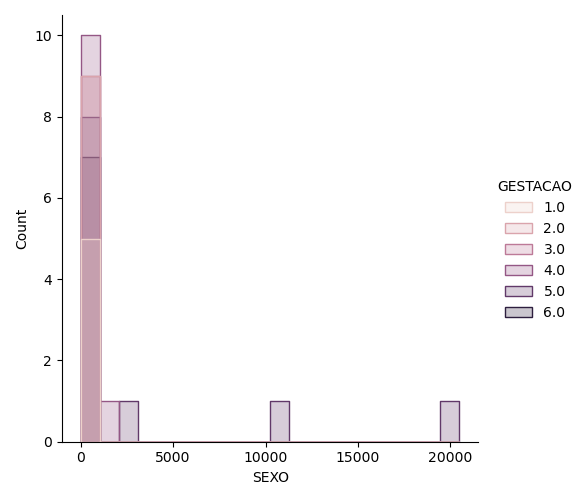

In [94]:
sns.displot(data = data
            ,x = 'SEXO'
            ,hue = 'GESTACAO'
            ,bins = 20
            ,element = 'step'
            )

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [95]:
data1=sinasc['APGAR5'] 
data2=sinasc['GESTACAO']

tabela_cruzada = pd.crosstab(data2, data1, rownames=['GESTACAO'], colnames=['APGAR5'])
tabela_cruzada

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
GESTACAO,,,,,,,,,,,
1.0,1,0,1,0,0,0,0,1,0,3,1
2.0,7,0,8,6,1,0,2,10,24,19,8
3.0,0,0,2,1,5,7,7,11,61,55,13
4.0,2,2,2,2,8,11,17,56,362,1307,465
5.0,5,20,3,5,7,21,45,151,1417,13565,7284
6.0,1,0,0,0,0,1,1,5,44,423,223


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [96]:
# Corrigindo o índice das colunas e linhas da tabela cruzada:

tabela_cruzada.columns= ['APGAR5 0', 'APGAR5 1','APGAR5 2','APGAR5 3',
                          'APGAR5 4','APGAR5 5','APGAR5 6','APGAR5 7',
                          'APGAR5 8','APGAR5 9','APGAR5 10']

tabela_cruzada.index = ['Menos de 22 semanas', '22 a 27 semanas', '28 a 31 semanas', '32 a 36 semanas', 
                        '37 a 41 semanas', '42 semanas e mais']
tabela_cruzada

,APGAR5 0,APGAR5 1,APGAR5 2,APGAR5 3,APGAR5 4,APGAR5 5,APGAR5 6,APGAR5 7,APGAR5 8,APGAR5 9,APGAR5 10
Menos de 22 semanas,1,0,1,0,0,0,0,1,0,3,1
22 a 27 semanas,7,0,8,6,1,0,2,10,24,19,8
28 a 31 semanas,0,0,2,1,5,7,7,11,61,55,13
32 a 36 semanas,2,2,2,2,8,11,17,56,362,1307,465
37 a 41 semanas,5,20,3,5,7,21,45,151,1417,13565,7284
42 semanas e mais,1,0,0,0,0,1,1,5,44,423,223


In [97]:
for i in tabela_cruzada.index:
    print(tabela_cruzada.loc[i].value_counts(normalize=True)*100)

0    54.545455
1    36.363636
3     9.090909
Name: Menos de 22 semanas, dtype: float64
0     18.181818
8     18.181818
7      9.090909
6      9.090909
1      9.090909
2      9.090909
10     9.090909
24     9.090909
19     9.090909
Name: 22 a 27 semanas, dtype: float64
0     18.181818
7     18.181818
2      9.090909
1      9.090909
5      9.090909
11     9.090909
61     9.090909
55     9.090909
13     9.090909
Name: 28 a 31 semanas, dtype: float64
2       36.363636
8        9.090909
11       9.090909
17       9.090909
56       9.090909
362      9.090909
1307     9.090909
465      9.090909
Name: 32 a 36 semanas, dtype: float64
5        18.181818
20        9.090909
3         9.090909
7         9.090909
21        9.090909
45        9.090909
151       9.090909
1417      9.090909
13565     9.090909
7284      9.090909
Name: 37 a 41 semanas, dtype: float64
0      36.363636
1      27.272727
5       9.090909
44      9.090909
423     9.090909
223     9.090909
Name: 42 semanas e mais, dtype: float

####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.


0 a 3: 'asfixia grave'
4 a 5: 'asfixia moderada'
6 a 7: 'asfixia leve'
8 a 10: 'normal'

<IPython.core.display.Javascript object>


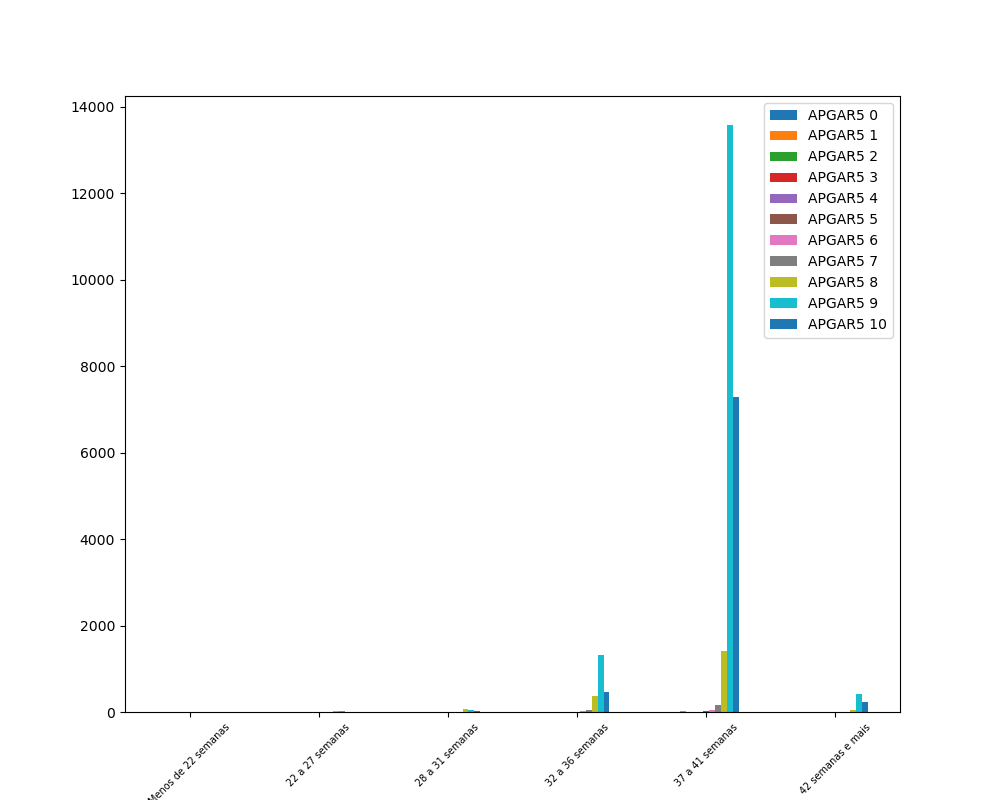

In [98]:
tabela_cruzada.plot(figsize=(10,8), kind='bar')
plt.xticks(rotation = 45, fontsize=7)
plt.show()

O gráfico acima permite identificar a ocorrência de nascimentos ocorridos entre a 36 e a 37 semana, apontando dados da variável 'APGAR5' que são coletados no momento do parto. Assim, levando em conta que uma gestação normal para humanos é de 37 a 42 se,anas, qualquer nascimento ocorrido antes de 37 semanas pode ser considerado prematuro. Logo, se o gráfico aponta nascimentos antes de 37 semanas ele corrobora com a afirmação dos médicos.

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

In [99]:
# Calculando o peso médio para o banco de dados:

peso_med = sinasc['PESO'].median
peso_med

<bound method NDFrame._add_numeric_operations.<locals>.median of 0        3685
1        3055
2        3460
3        2982
4        3310
         ... 
27023    2110
27024    3310
27025    3065
27026    2352
27027    4240
Name: PESO, Length: 27028, dtype: int64>

<IPython.core.display.Javascript object>


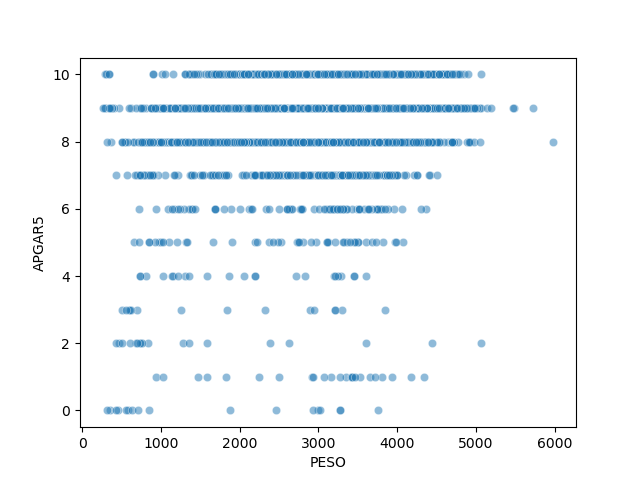

<AxesSubplot:xlabel='PESO', ylabel='APGAR5'>

In [100]:
plt.close('all')
sns.scatterplot(x = 'PESO'
                , y = 'APGAR5'
                , data = sinasc
                , alpha = .5  
               
               )

É possível inferir que a maioria dos bebês com o peso médio (3685g), apresentaram 'APGAR5' entre 8 e 10 que corresponde à categoria 'normal'.